In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df.head(100)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
95,137,accident,Charlotte,9 Mile backup on I-77 South...accident blockin...,1
96,138,accident,"Baton Rouge, LA",Has an accident changed your life? We will hel...,0
97,139,accident,"Hagerstown, MD",#BREAKING: there was a deadly motorcycle car a...,1
98,141,accident,"Gloucestershire , UK",@flowri were you marinading it or was it an ac...,0


In [3]:
from sklearn.model_selection import train_test_split
X,y = df[['keyword','location','text']],df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)
X_train.head()

,keyword,location,text
5836,rubble,"Dallas, Tejas",Photo: postapocalypticflimflam: Prodding aroun...
30,NaN,NaN,The end!
1879,crush,NaN,Man crush everyday ???? @CristianInspire http...
6852,trauma,I rap to burn shame.,@PTSD_Chat Yes. I feel the root of that is Sha...
2673,detonate,"Sharkatraz/Bindle's Cleft, PA",@AutoAmes everyone hoped we would join ISIS an...


In [4]:
X_test.isna()

,keyword,location,text
2644,False,True,False
2227,False,True,False
5448,False,False,False
132,False,True,False
6845,False,False,False
...,...,...,...
485,False,False,False
2239,False,False,False
3653,False,False,False
3469,False,False,False


<AxesSubplot:>

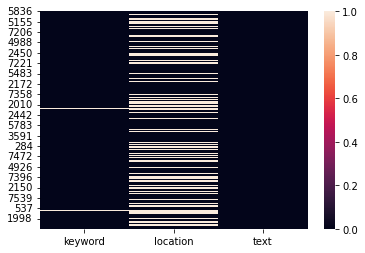

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(X_train.isna())

In [6]:
X_train['text'].iloc[0:10]

5836    Photo: postapocalypticflimflam: Prodding aroun...
30                                               The end!
1879    Man crush everyday ????  @CristianInspire http...
6852    @PTSD_Chat Yes. I feel the root of that is Sha...
2673    @AutoAmes everyone hoped we would join ISIS an...
2818    .POTUS #StrategicPatience is a strategy for #G...
4522                                Stream HYPE HURRICANE
5500    Reddit's new content policy goes into effect m...
5198    God the @mets are so cocky right now and I lov...
3861    @ErinMariefishy everyone is setting flames upo...
Name: text, dtype: object

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
stopword = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess(text):
    text = text.lower()
    # remove urls
    text = re.sub(r'http\S+','',text)
    # remove usernames
    text = re.sub(r'@\S+','',text)
    # remove punctuations
    text = re.sub(r':|\.|\?|#|;|-|>|<|=','',text)
    
    # removing stopwords
    words = word_tokenize(text)
    words = [word for word in words if not word in stopword]
    
    # stemming each word
    words = [ps.stem(word) for word in words]
    
    return words


In [8]:
i = 0
print(preprocess(X_train['text'].iloc[i]),X_train['text'].iloc[i],y_train.iloc[i])


['photo', 'postapocalypticflimflam', 'prod', 'around', 'rubbl'] Photo: postapocalypticflimflam: Prodding around the rubble. http://t.co/Bgy4i47j70 0


In [9]:
y_train = y_train.tolist()
# X_train = X_train.tolist()
# X_test = X_test.tolist()
y_test = y_test.tolist()

In [10]:
l = []
vocab = []
for text in X_train['text']:
    x = preprocess(text)
    l.append(x)
    for word in x:
        if word not in vocab:
            vocab.append(word)
        
X_train = l
len(vocab)

10367

In [11]:
freqs = {}
def count_freqs(text,y):
    for word in text:
        pair = (word,y)
        if pair in freqs.keys():
            freqs[pair] += 1
        else:
            freqs[pair] = 1
    return freqs

for text,y in zip(X_train,y_train):
    freqs = count_freqs(text,y)
    
        

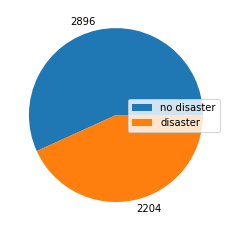

In [12]:
y_train_class = [0,0]
for i in y_train:
    if i == 0:
        y_train_class[0] += 1
    elif i == 1:
        y_train_class[1] += 1

# y_train_class
plt.pie(y_train_class,labels =y_train_class)
plt.legend(labels = ['no disaster','disaster'],loc = 'center right')
plt.show()

In [13]:
prob_y = [count/len(y_train) for count in y_train_class]
prob_y

[0.567843137254902, 0.432156862745098]

In [14]:
from math import log


# count P(w_i | y = 1) and P(w_i | y = 0)
def count_word_prob(word,class_prob = y_train_class,vocab = vocab):
    pair = (word,0)
    cnt = 0
    if pair in freqs.keys():
        cnt = freqs[pair]
    # laplacian smoothing alpha = 1 and k = len(vocab) 
    prob0 = (cnt + 1) / (class_prob[0] + len(vocab))
    
    
    pair = (word,1)
    cnt = 0
    if pair in freqs.keys():
        cnt = freqs[pair]
    # laplacian smoothing alpha = 1 and k = len(vocab) 
    prob1 = (cnt + 1) / (class_prob[1] + len(vocab))
    
    return log(prob0),log(prob1)

In [15]:
l_test = []
for text in X_test['text']:
    l_test.append(preprocess(text))
X_test = l_test

In [16]:
def predict(text):
    prob0,prob1 = log(y_train_class[0]),log(y_train_class[1])
    for word in text:
        p = count_word_prob(word)
        prob0 += p[0]
        prob1 += p[1]
    
    return int(p[0] > p[1])


In [17]:
y_hat = []
for text in X_test:
    y_hat.append(predict(text))
len(y_hat)

2513

In [18]:
y_hat = np.array(y_hat)
y_test = np.array(y_test)
accuracy = np.sum(y_hat == y_test) / len(y_test)

In [19]:
accuracy

0.3748507759649821